# Determining the Statistical Distribution of Brownian Motion
### Matthew Earnest
### BIO442: Biological Physics
### Professor Jesse Kinder
### February 13, 2026

In [1]:
############
# PREAMBLE #
############
import numpy as np, matplotlib.pyplot as plt
rng = np.random.default_rng()
rand = rng.random

# Abstract

This project analyzes the data from a particle undergoing Brownian motion by observing trends in its displacement between fixed intervals of time. A model was constructed to resemble the particle's motion to see if its results emulate the actual data. Then, both the actual data and the modeled data were analyzed to see if the displacement of the particle at each step qualitatively follows a particular statistical distribution.

# Problem

Consider a particle moving randomly through a medium without any external force applied to the particle nor any direction of flow throughout the medium. The only way the particle can move is through collisions with the molecules (or atoms) which compose the medium. Because there are too many bodies to consider, pinpointing the exact motion of the particle is unfeasible. Instead, a statistical distribution must be used to predict how far the particle will travel over a given period of time.

# Data

The given data set lists the $x$- and $y$-displacements of a particle in $\mu$m as recorded every $30$ seconds.

In [2]:
#########################
# IMPORTING THE DATASET #
#########################
real_data = np.loadtxt('g26perrindata.csv', delimiter = ',')

print(real_data)

[[ 13.82369181   9.47100825]
 [  9.91750061  10.8330913 ]
 [-10.09193174  14.5292149 ]
 ...
 [ -0.72033048  -1.12368396]
 [ -1.29633821  -1.19406846]
 [ -1.06860045  -1.62832004]]


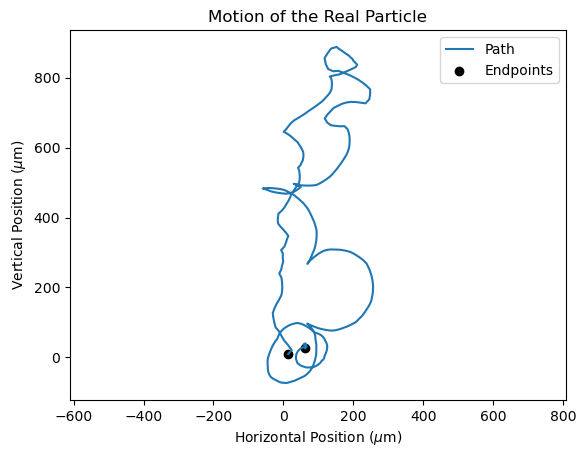

In [3]:
#####################
# PLOTTING THE WALK #
#####################
plt.plot(np.cumsum(real_data[:, 0]),
         np.cumsum(real_data[:, 1]), label = 'Path')
plt.scatter((real_data[0, 0], np.sum(real_data[:, 0])),
            (real_data[0, 1], np.sum(real_data[:, 1])), color = 'black', label = 'Endpoints')

plt.title('Motion of the Real Particle')
plt.axis('equal')
plt.xlabel('Horizontal Position ($\mu$m)')
plt.ylabel('Vertical Position ($\mu$m)')
plt.legend()

# Model

This model simulates random motion by flipping coins to choose a direction of travel, taking a small step of $1\mu$m in both the $x$- and $y$-directions, and repeating $500$ times to find a final position. That position is recorded as a single "walk," and $1000$ such walks were taken to create a data set.

In [4]:
###########################
# SIMULATING RANDOM WALKS #
###########################
# n = number of walks
# s = number of steps per walk
n = 1000
s = 500

# Create an n-by-2 array to hold the data
# The dimensions are chosen such that the array matches the shape of the real data
model_data = np.zeros((n, 2))

for k in range(n):
    # Flip s coins, each resulting in a displacement of +1 or -1 micrometer
    # Then, add them all up for a final displacement
    x = np.sum(2*(rand(s) > 0.5) - 1)
    y = np.sum(2*(rand(s) > 0.5) - 1)

    # Assign to k-th row
    model_data[k, :] = x, y

# Compare this result to the print(real_data) line above
print(model_data)

[[ 18.  -6.]
 [ 22.  32.]
 [ 20. -12.]
 ...
 [ -4. -22.]
 [ 24.  10.]
 [  8.  12.]]


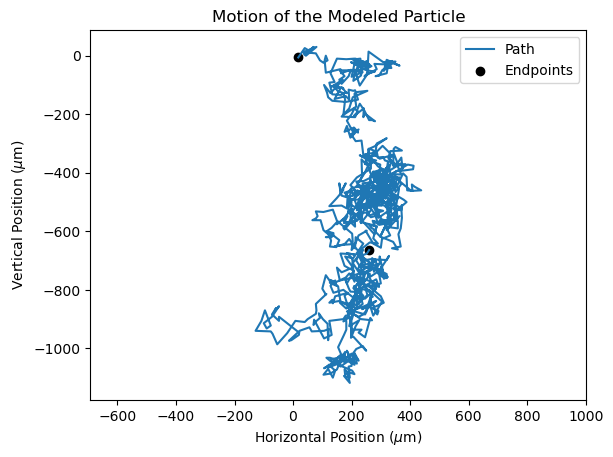

In [5]:
#####################
# PLOTTING THE WALK #
#####################
plt.plot(np.cumsum(model_data[:, 0]),
         np.cumsum(model_data[:, 1]), label = 'Path')
plt.scatter((model_data[0, 0], np.sum(model_data[:, 0])),
            (model_data[0, 1], np.sum(model_data[:, 1])), color = 'black', label = 'Endpoints')

plt.title('Motion of the Modeled Particle')
plt.axis('equal')
plt.xlabel('Horizontal Position ($\mu$m)')
plt.ylabel('Vertical Position ($\mu$m)')
plt.legend()

Notice the similarities and differences between the actual data and the model. Although the path of the modeled particle is much more jagged and erratic, they both have variable displacements and random directions at each step.

# Computation

To figure out whether the model approximates the data, we can look at the displacements between each step, squared:
\begin{equation}
    d^2 = (\Delta x)^2 + (\Delta y)^2
\end{equation}
Then, we can plot the data from each array on a histogram.

Text(0.5, 0, '$d^2$ ($\\mu$m$^2$)')

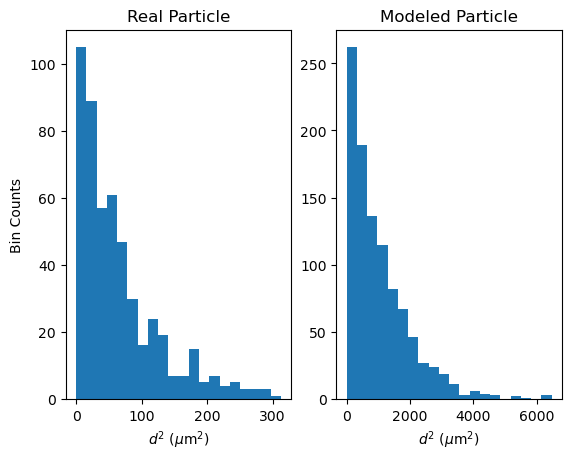

In [6]:
#############
# D^2 PLOTS #
#############
# Find the square of the displacements
# d^2 = delta_x^2 + delta_y^2
real_d_sq = real_data[:, 0]**2 + real_data[:, 1]**2
model_d_sq = model_data[:, 0]**2 + model_data[:, 1]**2

# Plot data
fig, axs = plt.subplots(1, 2)
axs[0].hist(real_d_sq, bins = 20, label = 'Real Data')
axs[0].set_title('Real Particle')
axs[0].set_xlabel('$d^2$ ($\mu$m$^2$)')
axs[0].set_ylabel('Bin Counts')

axs[1].hist(model_d_sq, bins = 20, label = 'Model Data')
axs[1].set_title('Modeled Particle')
axs[1].set_xlabel('$d^2$ ($\mu$m$^2$)')

Observe the similaries in shape&mdash;both of these histograms resemble an exponential function. This suggests that the displacements produced by the model data could qualitatively resemble the real data.

# Analysis

Simply looking like an exponential function is not quite compelling. A semi-log ($\log(y)$ vs $x$) plot can better show the relationship between the square displacement and its frequency.

Text(0.5, 0, '$d^2$ ($\\mu m^2$)')

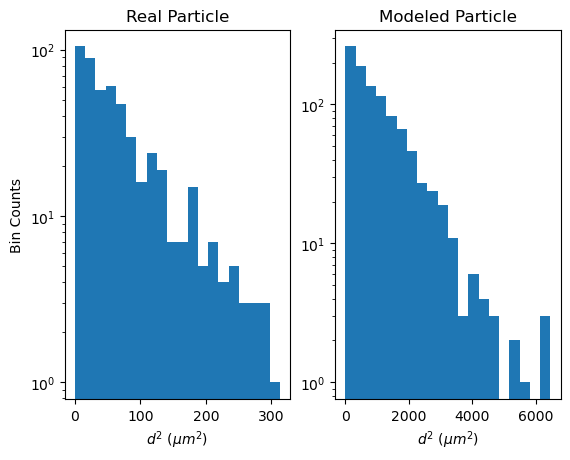

In [7]:
##################
# SEMI-LOG PLOTS #
##################
fig, axs = plt.subplots(1, 2)
axs[0].hist(real_d_sq, bins = 20, label = 'Real Data', log = True)
axs[0].set_title('Real Particle')
axs[0].set_xlabel('$d^2$ ($\mu m^2$)')
axs[0].set_ylabel('Bin Counts')

axs[1].hist(model_d_sq, bins = 20, label = 'Model Data', log = True)
axs[1].set_title('Modeled Particle')
axs[1].set_xlabel('$d^2$ ($\mu m^2$)')

Notice that on the semilog plot, the data appears roughly linear on both graphs. Thus, not only have we shown the exponential relationship on the prior plots, but we have also shown that these plots are indeed qualitatively identical.

---

Suppose $log(f(d))$ follows a linear relationship with $d^2$. That is, both the real data and the model data can be approximated by a function of the form
\begin{equation}
    \log(f(d)) = -m(d^2) + \log(b)
\end{equation}
where $m$ and $b$ are both positive parameters (hence the minus sign to signify a negative slope).

Solving for $f(d)$ gives us
\begin{gather}
    f(d) = \exp(-md^2 + \log(b)) \\
    f(d) = b \exp(-md^2)
\end{gather}

Recall that the base form of a Gaussian function is $f(x) = \exp(-x^2)$. In other words, we have shown that the displacement (**not** the square displacement) of a particle over a given time interval can be modeled by a Gaussian distribution.

# Summary

We have found that Brownian motion can be modeled by a Gaussian distribution. One implication of this is that using the mean and standard deviation of the displacements, the function
\begin{equation}
    f(d) = \frac{1}{\sqrt{2\pi \sigma^2}}\,\exp\Bigg(\!-\!\frac{(d-\mu)^2}{2\sigma^2}\Bigg)
\end{equation}
can be plotted and should roughly follow the data.

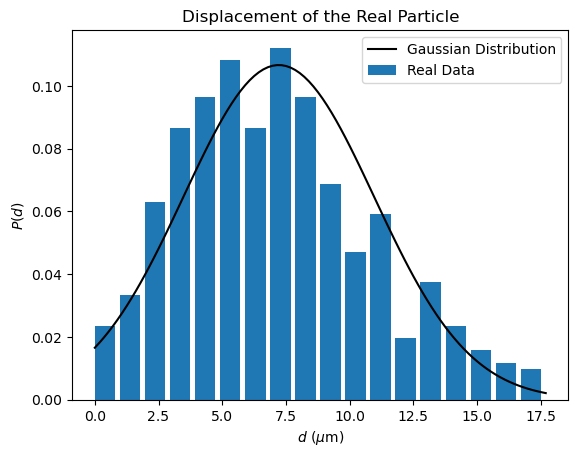

In [8]:
#########################
# GAUSSIAN DISTRIBUTION #
#########################
# d = sqrt(delta_x^2 + delta_y^2)
disp = (real_data[:, 0]**2 + real_data[:, 1]**2)**0.5

mu = np.mean(disp)
sigma = np.std(disp, ddof = 1)

# Plotting the data
bars = np.histogram(disp, bins = 18)
plt.bar(bars[1][:-1], bars[0]/len(disp), align = 'edge', label = 'Real Data')

# Plotting the function
d = np.linspace(np.min(disp), np.max(disp), 100)
f_d = (2*np.pi*sigma**2)**-0.5 * np.exp(-(d-mu)**2/(2*sigma**2))
plt.plot(d, f_d, color = 'black', label = 'Gaussian Distribution')

plt.title('Displacement of the Real Particle')
plt.xlabel('$d$ ($\mu$m)')
plt.ylabel('$P(d)$')
plt.legend()

Although this observation could have been made without constructing a model, the model provides a way to simulate significantly larger sample sizes within seconds for further analysis instead of taking several hours to acquire actual data.

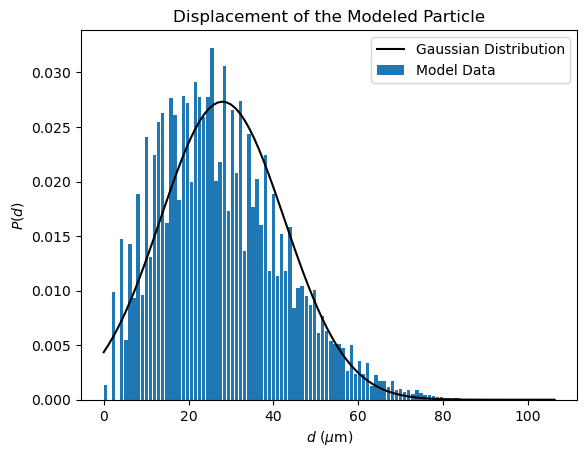

In [9]:
# 100000 steps
n = 100000
s = 500

model_data = np.zeros((n, 2))

for k in range(n):
    x = np.sum(2*(rand(s) > 0.5) - 1)
    y = np.sum(2*(rand(s) > 0.5) - 1)
    model_data[k, :] = x, y

disp = (model_data[:, 0]**2 + model_data[:, 1]**2)**0.5

mu = np.mean(disp)
sigma = np.std(disp, ddof = 1)

bars = np.histogram(disp, bins = 110)
plt.bar(bars[1][:-1], bars[0]/len(disp), align = 'edge', label = 'Model Data')

d = np.linspace(np.min(disp), np.max(disp), 100)
f_d = (2*np.pi*sigma**2)**-0.5 * np.exp(-(d-mu)**2/(2*sigma**2))
plt.plot(d, f_d, color = 'black', label = 'Gaussian Distribution')

plt.title('Displacement of the Modeled Particle')
plt.xlabel('$d$ ($\mu$m)')
plt.ylabel('$P(d)$')
plt.legend()